## Importing and Cleaning the data

In [ ]:
# Importing Libaries

import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

## Filtering for United States Data Analyst Postings

In [92]:
df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].copy()

## Trend of Skills throughout the Year

In [93]:
# Creating the job posted month number

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [94]:
df_DA_US_exploded = df_DA_US.explode(column="job_skills")

df_DA_US_exploded.dropna(subset="job_skills", inplace=True)


# Creating a pivot table
df_DA_US_pivot = df_DA_US_exploded.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size")
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

# Sorting Values
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot.drop("Total", inplace=True)


In [95]:
# Turning the numeric values into percentages

total_jobs_per_month = df_DA_US.groupby("job_posted_month_no").size()
df_DA_US_percent = df_DA_US_pivot.div(total_jobs_per_month/100, axis=0)

In [96]:
# Creating month name for month number and setting it as index
df_DA_US_percent.reset_index(inplace=True)
df_DA_US_percent['job_posted_month_name'] = df_DA_US_percent['job_posted_month_no'].apply(lambda month_no: pd.to_datetime(month_no, format="%m").strftime("%b"))

df_DA_US_percent.set_index(keys="job_posted_month_name", inplace=True)
df_DA_US_percent.drop("job_posted_month_no", axis=1, inplace=True)

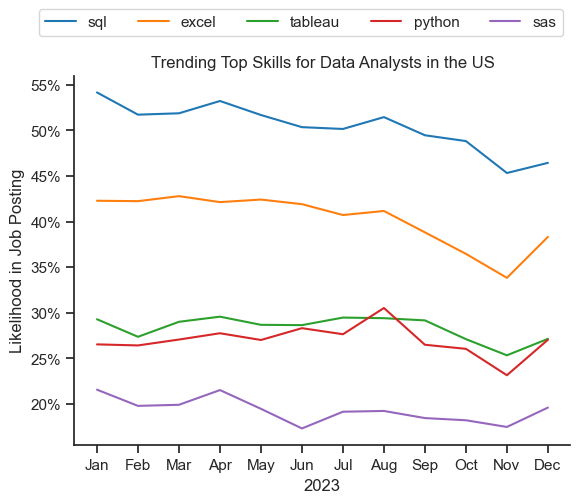

In [91]:
# Plotting the line graph

df_plot = df_DA_US_percent.iloc[:, :5]

sns.set_theme(style="ticks")
sns.lineplot(data=df_plot, dashes=False, palette="tab10")
sns.despine()

plt.title("Trending Top Skills for Data Analysts in the US")
plt.ylabel("Likelihood in Job Posting")
plt.xlabel('2023')
plt.legend(loc="upper right", bbox_to_anchor=(1, 1.2), ncol=5)

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))